In [34]:
import pandas as pd
import numpy as np
import random
random_seed = 42 

np.random.seed(random_seed)
random.seed(random_seed)

In [35]:
def augment_data(df):
    for name, sequence in zip(df["Nombre"], df["sequence"]):
        new_row = [name,sequence[::-1]]
        # Add the row in-place using the next index
        df.loc[len(df)] = new_row

    return df

# **Preprocessing GH18 sequences**

In [36]:
gh18 = pd.read_csv("GH18 - GH19/GH18.csv")
gh18.head(10)

,Nombre,Secuencia
0,AAB97779.1,MRKFNKPLLALLIGSTLCSAAQAAAPGKPTIAWGNTKFAIVEVDQA...
1,AAC44673.1,EYHMGNTMTKAIYDKFKAATPYGNTVATGAVPSETVDIAVSIGGFK...
2,AAM08773.1,MVNGYLFREYIGAQFTGVRFSDVPVNPGLSFHFILAFAIDYFMATQ...
3,AAM08776.1,MTNGYLFREYIGAQFTGVRFSDVPINPNLSFNFILSFAIDYTSPAG...
4,BAB79618.1,MKQHVKTLKLSQMASILGAIFCANSYAYNCDGLPEWSQSSAYNGGA...
5,ABC66095.1,MKKVFSNKKFLVFSFIFAMILSLSFFNGESAKASSDKSYKIIGYYP...
6,AAA26720.1,MGYFTNWGVYGRNYHVKNLVTSGSAEKITHINLRFGNVQGGKCTIG...
7,AAA27854.1,YVRGCYYTNWAQYRDGEGKFLPGNIPNGLCTHILYAFAKVDELGDS...
8,AAA33120.1,MAAHKITTTLSIFFLLSSIFRSSDAAGIAIYWGQNGNEGSLASTCA...
9,AAA61639.1,MRLIILFVAISLVSTIAVASPNKVVCYFGAWSVYRQGNGKFDINGI...


In [37]:
gh18.rename(columns={'Secuencia': 'sequence'}, inplace=True)
gh18.head(10)

,Nombre,sequence
0,AAB97779.1,MRKFNKPLLALLIGSTLCSAAQAAAPGKPTIAWGNTKFAIVEVDQA...
1,AAC44673.1,EYHMGNTMTKAIYDKFKAATPYGNTVATGAVPSETVDIAVSIGGFK...
2,AAM08773.1,MVNGYLFREYIGAQFTGVRFSDVPVNPGLSFHFILAFAIDYFMATQ...
3,AAM08776.1,MTNGYLFREYIGAQFTGVRFSDVPINPNLSFNFILSFAIDYTSPAG...
4,BAB79618.1,MKQHVKTLKLSQMASILGAIFCANSYAYNCDGLPEWSQSSAYNGGA...
5,ABC66095.1,MKKVFSNKKFLVFSFIFAMILSLSFFNGESAKASSDKSYKIIGYYP...
6,AAA26720.1,MGYFTNWGVYGRNYHVKNLVTSGSAEKITHINLRFGNVQGGKCTIG...
7,AAA27854.1,YVRGCYYTNWAQYRDGEGKFLPGNIPNGLCTHILYAFAKVDELGDS...
8,AAA33120.1,MAAHKITTTLSIFFLLSSIFRSSDAAGIAIYWGQNGNEGSLASTCA...
9,AAA61639.1,MRLIILFVAISLVSTIAVASPNKVVCYFGAWSVYRQGNGKFDINGI...


In [38]:
gh18 = augment_data(gh18)

In [39]:
gh18['label'] = np.ones(len(gh18), dtype=np.int32)
gh18.head(10)

,Nombre,sequence,label
0,AAB97779.1,MRKFNKPLLALLIGSTLCSAAQAAAPGKPTIAWGNTKFAIVEVDQA...,1
1,AAC44673.1,EYHMGNTMTKAIYDKFKAATPYGNTVATGAVPSETVDIAVSIGGFK...,1
2,AAM08773.1,MVNGYLFREYIGAQFTGVRFSDVPVNPGLSFHFILAFAIDYFMATQ...,1
3,AAM08776.1,MTNGYLFREYIGAQFTGVRFSDVPINPNLSFNFILSFAIDYTSPAG...,1
4,BAB79618.1,MKQHVKTLKLSQMASILGAIFCANSYAYNCDGLPEWSQSSAYNGGA...,1
5,ABC66095.1,MKKVFSNKKFLVFSFIFAMILSLSFFNGESAKASSDKSYKIIGYYP...,1
6,AAA26720.1,MGYFTNWGVYGRNYHVKNLVTSGSAEKITHINLRFGNVQGGKCTIG...,1
7,AAA27854.1,YVRGCYYTNWAQYRDGEGKFLPGNIPNGLCTHILYAFAKVDELGDS...,1
8,AAA33120.1,MAAHKITTTLSIFFLLSSIFRSSDAAGIAIYWGQNGNEGSLASTCA...,1
9,AAA61639.1,MRLIILFVAISLVSTIAVASPNKVVCYFGAWSVYRQGNGKFDINGI...,1


In [40]:
gh18_names = gh18[["Nombre"]]
gh18_names.head(10)

,Nombre
0,AAB97779.1
1,AAC44673.1
2,AAM08773.1
3,AAM08776.1
4,BAB79618.1
5,ABC66095.1
6,AAA26720.1
7,AAA27854.1
8,AAA33120.1
9,AAA61639.1


In [41]:
gh18_seq = gh18[["sequence", "label"]]
gh18_seq.head(10)

,sequence,label
0,MRKFNKPLLALLIGSTLCSAAQAAAPGKPTIAWGNTKFAIVEVDQA...,1
1,EYHMGNTMTKAIYDKFKAATPYGNTVATGAVPSETVDIAVSIGGFK...,1
2,MVNGYLFREYIGAQFTGVRFSDVPVNPGLSFHFILAFAIDYFMATQ...,1
3,MTNGYLFREYIGAQFTGVRFSDVPINPNLSFNFILSFAIDYTSPAG...,1
4,MKQHVKTLKLSQMASILGAIFCANSYAYNCDGLPEWSQSSAYNGGA...,1
5,MKKVFSNKKFLVFSFIFAMILSLSFFNGESAKASSDKSYKIIGYYP...,1
6,MGYFTNWGVYGRNYHVKNLVTSGSAEKITHINLRFGNVQGGKCTIG...,1
7,YVRGCYYTNWAQYRDGEGKFLPGNIPNGLCTHILYAFAKVDELGDS...,1
8,MAAHKITTTLSIFFLLSSIFRSSDAAGIAIYWGQNGNEGSLASTCA...,1
9,MRLIILFVAISLVSTIAVASPNKVVCYFGAWSVYRQGNGKFDINGI...,1


# **Preprocessing GH19 sequences**

In [42]:
gh19 = pd.read_csv("GH18 - GH19/GH19.csv")
gh19.head(10)

,Nombre,Secuencia
0,BAE86996.1,MLNPSKLSVLLGWAIAASSHAAMNIQPDPENPNGYVVARADITAAE...
1,AAA18586.1,MRAFVLFAVVAMAATMAVAEQCGSQAGGATCPNCLCCSRFGWCGST...
2,AAA32769.1,MPPQKENHRTLNKMKTNLFLFLIFSLLLSLSSAEQCGRQAGGALCP...
3,AAA32941.1,MRSLAVVVAVVATVAMAIGTARGSVSSIVSRAQFDRMLLHRNDGAC...
4,AAA33444.1,MANAPRILALGLLALLCAAAGPAAAQNCGCQPNFCCSKFGYCGTTD...
5,AAA33445.1,PQLVALGLALLCAVAGPAAAQNCGCQPNVCCSKFGYCGTTDEYCGD...
6,AAA34219.1,MMMRFLSAVVIMSSAMAVGLVSAQRCGSQGGGGTCPALWCCSIWGW...
7,AAA75196.1,MSKLRIPILLVLFIVSCCSAEQCGTQAGGALCPGGLCCSKFGWCGS...
8,AAB08470.1,MKTFFIFLTAIFIAASLVSAQNCNCTAGLCCSKHGYCGTTSDYCGE...
9,AAB58239.2,NGQYRICKLLICAMRRLLPLAGATLLIAAAGGASGQQAGVGSIITR...


In [43]:
gh19.rename(columns={'Secuencia': 'sequence'}, inplace=True)
gh19.head(10)

,Nombre,sequence
0,BAE86996.1,MLNPSKLSVLLGWAIAASSHAAMNIQPDPENPNGYVVARADITAAE...
1,AAA18586.1,MRAFVLFAVVAMAATMAVAEQCGSQAGGATCPNCLCCSRFGWCGST...
2,AAA32769.1,MPPQKENHRTLNKMKTNLFLFLIFSLLLSLSSAEQCGRQAGGALCP...
3,AAA32941.1,MRSLAVVVAVVATVAMAIGTARGSVSSIVSRAQFDRMLLHRNDGAC...
4,AAA33444.1,MANAPRILALGLLALLCAAAGPAAAQNCGCQPNFCCSKFGYCGTTD...
5,AAA33445.1,PQLVALGLALLCAVAGPAAAQNCGCQPNVCCSKFGYCGTTDEYCGD...
6,AAA34219.1,MMMRFLSAVVIMSSAMAVGLVSAQRCGSQGGGGTCPALWCCSIWGW...
7,AAA75196.1,MSKLRIPILLVLFIVSCCSAEQCGTQAGGALCPGGLCCSKFGWCGS...
8,AAB08470.1,MKTFFIFLTAIFIAASLVSAQNCNCTAGLCCSKHGYCGTTSDYCGE...
9,AAB58239.2,NGQYRICKLLICAMRRLLPLAGATLLIAAAGGASGQQAGVGSIITR...


In [44]:
gh19 = augment_data(gh19)

In [45]:
gh19['label'] = np.ones(len(gh19), dtype=np.int32)
gh19.head(10)

,Nombre,sequence,label
0,BAE86996.1,MLNPSKLSVLLGWAIAASSHAAMNIQPDPENPNGYVVARADITAAE...,1
1,AAA18586.1,MRAFVLFAVVAMAATMAVAEQCGSQAGGATCPNCLCCSRFGWCGST...,1
2,AAA32769.1,MPPQKENHRTLNKMKTNLFLFLIFSLLLSLSSAEQCGRQAGGALCP...,1
3,AAA32941.1,MRSLAVVVAVVATVAMAIGTARGSVSSIVSRAQFDRMLLHRNDGAC...,1
4,AAA33444.1,MANAPRILALGLLALLCAAAGPAAAQNCGCQPNFCCSKFGYCGTTD...,1
5,AAA33445.1,PQLVALGLALLCAVAGPAAAQNCGCQPNVCCSKFGYCGTTDEYCGD...,1
6,AAA34219.1,MMMRFLSAVVIMSSAMAVGLVSAQRCGSQGGGGTCPALWCCSIWGW...,1
7,AAA75196.1,MSKLRIPILLVLFIVSCCSAEQCGTQAGGALCPGGLCCSKFGWCGS...,1
8,AAB08470.1,MKTFFIFLTAIFIAASLVSAQNCNCTAGLCCSKHGYCGTTSDYCGE...,1
9,AAB58239.2,NGQYRICKLLICAMRRLLPLAGATLLIAAAGGASGQQAGVGSIITR...,1


In [46]:
gh19_names = gh19[["Nombre"]]
gh19_names.head(10)

,Nombre
0,BAE86996.1
1,AAA18586.1
2,AAA32769.1
3,AAA32941.1
4,AAA33444.1
5,AAA33445.1
6,AAA34219.1
7,AAA75196.1
8,AAB08470.1
9,AAB58239.2


In [47]:
gh19_seq = gh19[["sequence", "label"]]
gh19_seq.head(10)

,sequence,label
0,MLNPSKLSVLLGWAIAASSHAAMNIQPDPENPNGYVVARADITAAE...,1
1,MRAFVLFAVVAMAATMAVAEQCGSQAGGATCPNCLCCSRFGWCGST...,1
2,MPPQKENHRTLNKMKTNLFLFLIFSLLLSLSSAEQCGRQAGGALCP...,1
3,MRSLAVVVAVVATVAMAIGTARGSVSSIVSRAQFDRMLLHRNDGAC...,1
4,MANAPRILALGLLALLCAAAGPAAAQNCGCQPNFCCSKFGYCGTTD...,1
5,PQLVALGLALLCAVAGPAAAQNCGCQPNVCCSKFGYCGTTDEYCGD...,1
6,MMMRFLSAVVIMSSAMAVGLVSAQRCGSQGGGGTCPALWCCSIWGW...,1
7,MSKLRIPILLVLFIVSCCSAEQCGTQAGGALCPGGLCCSKFGWCGS...,1
8,MKTFFIFLTAIFIAASLVSAQNCNCTAGLCCSKHGYCGTTSDYCGE...,1
9,NGQYRICKLLICAMRRLLPLAGATLLIAAAGGASGQQAGVGSIITR...,1


# **Spliting Dataset into Train, Test, Validation datasets**

In [48]:
def split_dataframe(df, train_ratio=0.7, test_ratio=0.2, val_ratio=0.1, random_state=42):
    # Shuffle the DataFrame
    df_shuffled = df.sample(frac=1, random_state=random_state).reset_index(drop=True)
    
    # Calculate the indices for splits
    train_end = int(len(df_shuffled) * train_ratio)
    test_end = train_end + int(len(df_shuffled) * test_ratio)
    val_end = len(df_shuffled) 


    # Split the DataFrame
    train_df = df_shuffled[:train_end]
    test_df = df_shuffled[train_end:test_end]
    val_df = df_shuffled[test_end:val_end]
    
    return train_df, test_df, val_df

## **GH18**

In [49]:
train_gh18, test_gh18, valid_gh18 = split_dataframe(gh18_seq)

In [50]:
len(train_gh18), len(test_gh18), len(valid_gh18)

(512, 146, 74)

## **GH19**

In [51]:
train_gh19, test_gh19, valid_gh19 = split_dataframe(gh19_seq)

In [52]:
len(train_gh19), len(test_gh19), len(valid_gh19)

(130, 37, 19)

# **Concatenating GH18 and GH19**

In [23]:
train = pd.concat([train_gh18,train_gh19], ignore_index=True)
train_shuffled = train.sample(frac=1, random_state=random_seed).reset_index(drop=True)
train_shuffled.head(10)

,sequence,label
0,MFNKAKGRARHAVLITLLSLSAGVFAAPAWQEGSTYTAGTVVSYNG...,1
1,MATLYTPYIDVSLNALWSDWQNYPKGRPNPIYSQQAISYGVDGLVL...,1
2,MKIVLINKSKKFFVFSFIFVMMLSLPFVNGEVAKADSGKNYKIIGY...,1
3,MSSLGQIFAILMAITCMSCTMIAAQNCGCASGVCCSQYGYCGNGDA...,1
4,MLGFLGKSVALLAALQATLTSASPLSTNDVTVEKRASGYANAVYFT...,1
5,MKSIRFSAMAIALVTMGTMNLYFASAEQCGRQASGALCPGGLCCSK...,1
6,MHHLRALVGVGLAGLAAGVPLTDKISVKPRQAPGAQNVVYWGQNGG...,1
7,MRLREFTALSSLLFSLLLLSASAEQCGSQAGGARCASGLCCSKFGW...,1
8,MMSGLIASLTLSLFQFAALPPAPAEAATGYKIVGYYPSWGAYGRNY...,1
9,AWNCCSCSTDFVLGAGCHEFYSRGNSCNYFQNKNKPDPYMGSAKGA...,1


In [24]:
test = pd.concat([test_gh18,test_gh19], ignore_index=True)
test_shuffled = test.sample(frac=1, random_state=random_seed).reset_index(drop=True)
test_shuffled.head(10)

,sequence,label
0,MFKKTLAVAGLALAANNAFAATNCSDLTDWNSSTAYTGGTSVKHAN...,1
1,SIKEWAGWESSGPIEGQTWWKCRYTEGNYVVIDGGNYVTKSDYTPY...,1
2,MVYCTASLPLLLLLLVGLLAGEAFAEQCGRQAGGALCPGGLCCSQF...,1
3,MRKFNKPLLALLIGSTLCSAAQAAAPGKPTLAWGNTKFAIVEVDQA...,1
4,MKFNIVSPVALSCLFFLFLTGTLAQNAGSIVTRELFEQMLSFRNND...,1
5,KDNIPYFETIQKGFDVADITSPNQGLAWVMFGSFNNYSNLAPGENN...,1
6,HHHHHHTTITKEQCDVNSPYDCTSTKPNFMLGTPCKMKYATGGACQ...,1
7,ERGTPLLENSAKLGSQLAAWFGANEYGMAWVSTGGLGLRTVLATKT...,1
8,MANSVTLFAIIFSCFLLQQLVCTNSQNVKGGYWFKDSGLALNNIDS...,1
9,DATIEWIMVGGLGNKLMYDVKIGIARPDDFTIFIRKSPSYLWAVQA...,1


In [25]:
valid = pd.concat([valid_gh18,valid_gh19], ignore_index=True)
valid_shuffled = valid.sample(frac=1, random_state=random_seed).reset_index(drop=True)
valid_shuffled.head(10)

,sequence,label
0,VGYFAEWGVYGRNYHVNNIRTSGSASKLTHILYAFGNTTGGRCSIG...,1
1,SVAYFVNWAIYGRNYNPQDMPADKLTHVLYAFANVRPDTGEVYLSD...,1
2,AMQKRMNDYKSDPYNLLNETADPGGLKNSSTGILSDPGKRDASAEW...,1
3,LEDRMKFQANMTNLLDGNDADIEWAFLGGLKNQDVYRSKALVSDVS...,1
4,VKWDSTDYGAAWFFYGGLKLAQAFGVKVSVTFPDDYGIWTSGSYSY...,1
5,MLMQPFLCFAAVLVSRALAMQPPKGVAVYWGQNSGGDQERLRHTCE...,1
6,DGSIEWVILGGYGNSNIYDCRASLSTTDEYSLVIGQSANYLWPTKA...,1
7,SVVYFVNWAIYGRGHNPQDLKADQFTHILYAFANIRPSGEVYLSDT...,1
8,MRLLPFVTCFLALTATWSNAAPSSNSTTDTADGGKVIVGYFPNWLY...,1
9,MRKFNKPLLALLIGSTLCSAAQAAAPGKPSIASGPTKFAIVEVDQQ...,1


# **Exporting Dataframes**

In [26]:
train_shuffled.to_csv("Positive Samples/Data Augmentation/my_train_positive_augmented.csv", index=False)
test_shuffled.to_csv("Positive Samples/Data Augmentation/my_test_positive_augmented.csv", index=False)
valid_shuffled.to_csv("Positive Samples/Data Augmentation/my_valid_positive_augmented.csv", index=False)

In [28]:
print("Total: ", len(gh18)+len(gh19))
print("GH 18: ", len(gh18))
print("GH 19: ", len(gh19))

Total:  918
GH 18:  732
GH 19:  186


# **Analysing dataset**

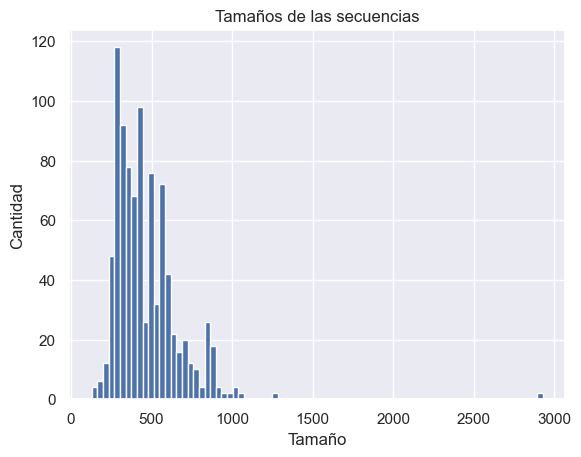

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

gh = pd.concat([gh18,gh19], axis=0)
# Analysing wich sequences are longer than the
longitudes = [len(seq) for seq in gh["sequence"]]
plt.hist(longitudes, bins=80)
plt.ylabel("Cantidad")
plt.xlabel("Tamaño")
plt.title("Tamaños de las secuencias")
# Show the plot
plt.show()

In [29]:
print("Datasets sizes")
print("Train: ", len(train_shuffled))
print("Test: ", len(test_shuffled))
print("Validation: ", len(valid_shuffled))

Datasets sizes
Train:  642
Test:  183
Validation:  93
